In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [2]:
#Data
# tips = np.array([1.4, 1.9, 3.2])
# meal_cost = np.array([0.5, 2.3, 2.9])
tips = np.array([5,17,11,8,14,5])
meal_cost = np.array([34,108,64,88,99,51])

In [3]:
#Fitting line
def line(a, b):
    '''
    Function that calculate y - values for x-axis depends on a and b param.
    y = ax + b
    '''
    loss_function = lambda x: a*x + b
    fitting_line = [loss_function(i) for i in meal_cost]
    return fitting_line

fitting_line = line(0.1, 0)

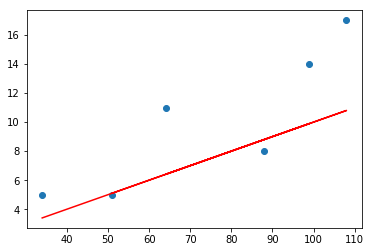

In [4]:
plt.scatter(meal_cost, tips)
plt.plot(meal_cost, fitting_line, 'r')
plt.show()

Plot for random values a = 0.1 and b = 0

In [5]:
def ssr(actual, predicted):# Sum of the squered residuals
    ssr_ = 0
    for i in range(len(actual)):
        ssr_ += (actual[i] - predicted[i]) ** 2
    return ssr_

In [6]:
ssr(tips, fitting_line)

79.61999999999999

SSE for this values is: 79

In [7]:
def ssr_to_intercept(a, b, step):
    '''
    Function that show how ssr changes in depend on intercept.
    Param: a: slope.
    Param: b: intercept.
    Param step: next step.
    return plot x-axis - intercept, y-axis - ssr
    '''
    loss_function = lambda x: a*x + b
    ssr_table = []
    b_table = []
    for i in range(50):
        b_table.append(b)
        fitting_line = [loss_function(i) for i in meal_cost]
        ssr_table.append(ssr(tips, fitting_line))
        b += step
    print(f'Best intercept value: {b_table[ssr_table.index(min(ssr_table))]}')
    return plt.plot(b_table, ssr_table)

Best intercept value: 2.64


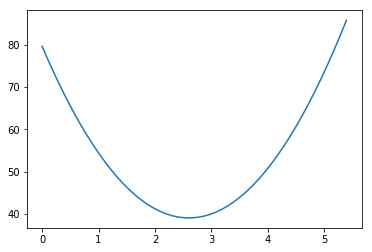

In [8]:
ssr_to_intercept(0.1, 0, 0.11)

In [9]:
def Gradient_descent(a, b, lr):
    '''
    Function that calcuate best values of slope and intercept for best fitting line (linear regression).
    '''
    for i in range(1000):
        db = np.sum(-2*(tips - line(a, b)))
        da = np.sum(-2*meal_cost * (tips - line(a, b)))
        step_size_db = db * lr
        step_size_da = da * lr
        if abs(step_size_db) < lr*0.01 or abs(step_size_da) < lr * 0.01:
            break
        b = b - step_size_db
        a = a - step_size_da
    return a, b

Gradient_descent(0.1, 0, 0.00001)

(0.13652063740851753, -0.010663213729232981)

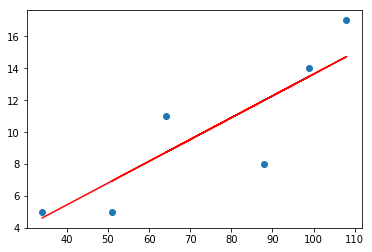

In [10]:
a, b = Gradient_descent(0.1, 0, 0.00001)
fitting_line = line(a, b)

 
plt.scatter(meal_cost, tips)
plt.plot(meal_cost, fitting_line, 'r')
plt.show()

In [127]:
ssr(tips, fitting_line)

30.521191852370684

SSE after Calculating slope and intercept with gradient descent